TensorFlow version: 2.19.0
GPUs: []
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ANNOT_DIR: /content/drive/MyDrive/UAV Project/Annotations
IMAGE_DIR: /content/drive/MyDrive/UAV Project/JPEGImages
Sample XMLs: ['image2279.xml', 'image2328.xml', 'image2327.xml', 'image2388.xml', 'image2312.xml']
Sample JPGs: ['image2316.jpg', 'image2307.jpg', 'image2346.jpg', 'image2336.jpg', 'image2319.jpg']
Local patch folders: /content/patches/positive /content/patches/negative
Total images found: 2426
Images with bbox info: 2426
Processed 0/2426 images...
Processed 200/2426 images...
Processed 400/2426 images...
Processed 600/2426 images...
Processed 800/2426 images...
Processed 1000/2426 images...
Processed 1200/2426 images...
Processed 1400/2426 images...
Processed 1600/2426 images...
Processed 1800/2426 images...
Processed 2000/2426 images...
Processed 2200/2426 images...
Processed 2400/2426 images...
Patch generat

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 160, 160, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 80, 80, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 80, 80, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 40, 40, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 40, 40, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,569 (396.75 KB)

 Trainable params: 101,569 (396.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 682s 2s/step - accuracy: 0.8379 - loss: 0.4375 - val_accuracy: 0.8580 - val_loss: 0.3840
Epoch 2/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 672s 2s/step - accuracy: 0.8587 - loss: 0.3895 - val_accuracy: 0.8585 - val_loss: 0.3825
Epoch 3/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 693s 2s/step - accuracy: 0.8598 - loss: 0.3866 - val_accuracy: 0.8543 - val_loss: 0.4079
Epoch 4/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 732s 2s/step - accuracy: 0.8567 - loss: 0.3765 - val_accuracy: 0.8580 - val_loss: 0.4102
Epoch 5/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 679s 2s/step - accuracy: 0.8529 - loss: 0.3947 - val_accuracy: 0.8566 - val_loss: 0.3781


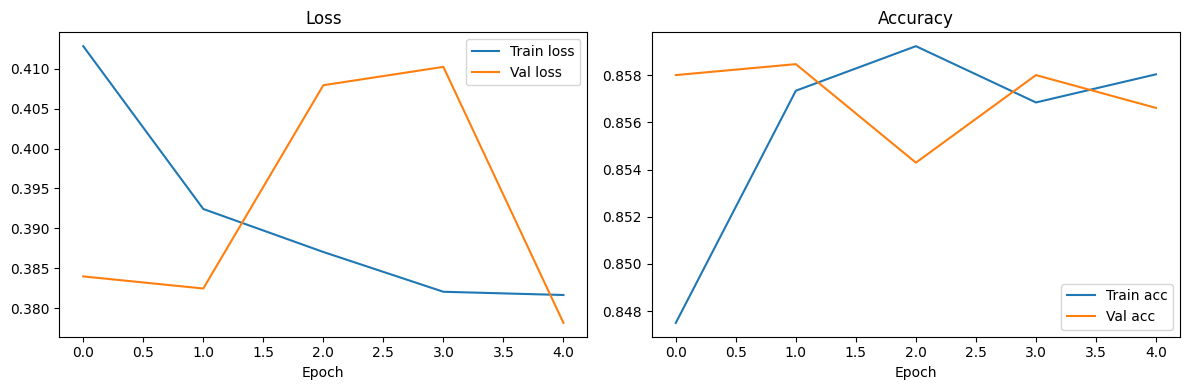

68/68 ━━━━━━━━━━━━━━━━━━━━ 39s 569ms/step - accuracy: 0.8566 - loss: 0.3692

Test loss: 0.3675, Test acc: 0.8613

Confusion matrix:
 [[  97  267]
 [  32 1760]]

Classification report:
               precision    recall  f1-score   support

           0       0.75      0.27      0.39       364
           1       0.87      0.98      0.92      1792

    accuracy                           0.86      2156
   macro avg       0.81      0.62      0.66      2156
weighted avg       0.85      0.86      0.83      2156



In [2]:
# === ONE CELL: FULL PIPELINE (COLAB) ============================
# 0) Imports, GPU info, Drive mount, path setup
# 1) Parse XMLs, build bbox dict
# 2) Generate positive/negative patches (fast-ish)
# 3) Build patch DataFrame
# 4) Train/Val/Test split
# 5) tf.data pipelines
# 6) CNN model, train, evaluate
# ================================================================

import os, random, time, shutil
import xml.etree.ElementTree as ET

import numpy as np
import pandas as pd
import cv2

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras import layers, models

import matplotlib.pyplot as plt

from google.colab import drive

print("TensorFlow version:", tf.__version__)
print("GPUs:", tf.config.list_physical_devices('GPU'))

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# --------------------------
# 0) Mount Drive & set paths
# --------------------------
drive.mount('/content/drive')

# CHANGE THIS if your folder name is different
DATA_ROOT = "/content/drive/MyDrive/UAV Project"
ANNOT_DIR = os.path.join(DATA_ROOT, "Annotations")
IMAGE_DIR = os.path.join(DATA_ROOT, "JPEGImages")

print("ANNOT_DIR:", ANNOT_DIR)
print("IMAGE_DIR:", IMAGE_DIR)
print("Sample XMLs:", os.listdir(ANNOT_DIR)[:5])
print("Sample JPGs:", os.listdir(IMAGE_DIR)[:5])

# We'll store FAST training patches locally (not in Drive) for speed
LOCAL_PATCH_ROOT = "/content/patches"
POS_DIR = os.path.join(LOCAL_PATCH_ROOT, "positive")
NEG_DIR = os.path.join(LOCAL_PATCH_ROOT, "negative")

# Clean any old stuff
if os.path.exists(LOCAL_PATCH_ROOT):
    shutil.rmtree(LOCAL_PATCH_ROOT)
os.makedirs(POS_DIR, exist_ok=True)
os.makedirs(NEG_DIR, exist_ok=True)

print("Local patch folders:", POS_DIR, NEG_DIR)

# -------------------------------------
# 1) Parse XMLs → dict of bounding boxes
# -------------------------------------
def get_all_images(image_dir):
    return sorted(
        [os.path.join(image_dir, f)
         for f in os.listdir(image_dir)
         if f.lower().endswith(".jpg")]
    )

all_images = get_all_images(IMAGE_DIR)
print("Total images found:", len(all_images))

img_bboxes = {}  # img_path → list of (xmin,ymin,xmax,ymax)

for img_path in all_images:
    img_name = os.path.basename(img_path)
    xml_name = os.path.splitext(img_name)[0] + ".xml"
    xml_path = os.path.join(ANNOT_DIR, xml_name)

    bboxes = []
    if os.path.exists(xml_path):
        try:
            tree = ET.parse(xml_path)
            root = tree.getroot()
            for obj in root.findall("object"):
                bb = obj.find("bndbox")
                xmin = int(bb.find("xmin").text)
                ymin = int(bb.find("ymin").text)
                xmax = int(bb.find("xmax").text)
                ymax = int(bb.find("ymax").text)
                bboxes.append((xmin, ymin, xmax, ymax))
        except Exception as e:
            print("XML parse error for:", xml_path, e)
    img_bboxes[img_path] = bboxes

print("Images with bbox info:", len(img_bboxes))

# ----------------------------------------
# 2) Patch generation (positive + negative)
# ----------------------------------------
PATCH_SIZE = 160
target_neg_per_image = 1  # keep small for speed

def rects_intersect(a, b):
    ax1, ay1, ax2, ay2 = a
    bx1, by1, bx2, by2 = b
    if ax1 >= bx2 or bx1 >= ax2:
        return False
    if ay1 >= by2 or by1 >= ay2:
        return False
    return True

records_patches = []
start_time = time.time()

for img_idx, (img_path, bboxes) in enumerate(img_bboxes.items()):
    img = cv2.imread(img_path)
    if img is None:
        continue

    h, w, _ = img.shape
    base_name = os.path.splitext(os.path.basename(img_path))[0]

    # POSITIVE PATCHES (around each bbox)
    for j, (xmin, ymin, xmax, ymax) in enumerate(bboxes):
        cx = (xmin + xmax) // 2
        cy = (ymin + ymax) // 2

        x1 = max(0, cx - PATCH_SIZE // 2)
        y1 = max(0, cy - PATCH_SIZE // 2)
        x2 = x1 + PATCH_SIZE
        y2 = y1 + PATCH_SIZE

        if x2 > w:
            x2 = w
            x1 = max(0, x2 - PATCH_SIZE)
        if y2 > h:
            y2 = h
            y1 = max(0, y2 - PATCH_SIZE)

        if x2 - x1 != PATCH_SIZE or y2 - y1 != PATCH_SIZE:
            continue

        patch = img[y1:y2, x1:x2]
        patch_fname = f"{base_name}_pos_{j}.jpg"
        patch_path = os.path.join(POS_DIR, patch_fname)
        cv2.imwrite(patch_path, patch)

        records_patches.append({
            "patch_path": patch_path,
            "source_image": img_path,
            "label": 1
        })

    # NEGATIVE PATCHES (random, away from bboxes)
    if len(bboxes) > 0:
        neg_count = 0
        max_tries = 10  # small for speed
        tries = 0
        while neg_count < target_neg_per_image and tries < max_tries:
            tries += 1
            x1 = random.randint(0, max(0, w - PATCH_SIZE))
            y1 = random.randint(0, max(0, h - PATCH_SIZE))
            x2 = x1 + PATCH_SIZE
            y2 = y1 + PATCH_SIZE

            candidate = (x1, y1, x2, y2)
            if any(rects_intersect(candidate, bb) for bb in bboxes):
                continue

            patch = img[y1:y2, x1:x2]
            patch_fname = f"{base_name}_neg_{neg_count}.jpg"
            patch_path = os.path.join(NEG_DIR, patch_fname)
            cv2.imwrite(patch_path, patch)

            records_patches.append({
                "patch_path": patch_path,
                "source_image": img_path,
                "label": 0
            })
            neg_count += 1

    if img_idx % 200 == 0:
        print(f"Processed {img_idx}/{len(img_bboxes)} images...")

elapsed = time.time() - start_time
print(f"Patch generation done in {elapsed:.1f} sec")
print("Total patches created:", len(records_patches))

# ------------------------
# 3) Build patch DataFrame
# ------------------------
patch_df = pd.DataFrame(records_patches)
print("\nPatch DataFrame shape:", patch_df.shape)
print("Label counts:\n", patch_df["label"].value_counts())
print("Label proportions:\n", patch_df["label"].value_counts(normalize=True))

# --------------------------------
# 4) Train / Val / Test split
# --------------------------------
train_p, temp_p = train_test_split(
    patch_df,
    test_size=0.3,
    stratify=patch_df["label"],
    random_state=SEED
)

val_p, test_p = train_test_split(
    temp_p,
    test_size=0.5,
    stratify=temp_p["label"],
    random_state=SEED
)

print("\nTrain:", len(train_p), "Val:", len(val_p), "Test:", len(test_p))
for name, subset in [("Train", train_p), ("Val", val_p), ("Test", test_p)]:
    print(f"{name} label counts:\n{subset['label'].value_counts()}\n")

# ----------------------------
# 5) tf.data pipelines
# ----------------------------
IMG_SIZE = (PATCH_SIZE, PATCH_SIZE)
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

def make_tf_dataset(df_part, shuffle=True):
    paths = df_part["patch_path"].values
    labels = df_part["label"].values.astype("float32")

    ds = tf.data.Dataset.from_tensor_slices((paths, labels))

    def preprocess(path, label):
        img = tf.io.read_file(path)
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.resize(img, IMG_SIZE)
        img = img / 255.0
        return img, label

    ds = ds.map(preprocess, num_parallel_calls=AUTOTUNE)
    if shuffle:
        ds = ds.shuffle(min(len(df_part), 5000), seed=SEED)
    ds = ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)
    return ds

train_ds = make_tf_dataset(train_p, shuffle=True)
val_ds   = make_tf_dataset(val_p, shuffle=False)
test_ds  = make_tf_dataset(test_p, shuffle=False)

# ----------------------------
# 6) CNN model, train, evaluate
# ----------------------------
data_aug = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.1),
])

def build_cnn():
    inp = layers.Input(shape=IMG_SIZE + (3,))
    x = data_aug(inp)
    x = layers.Conv2D(32, 3, padding='same', activation='relu')(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
    x = layers.MaxPooling2D()(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    out = layers.Dense(1, activation='sigmoid')(x)

    model = models.Model(inp, out)
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

model = build_cnn()
model.summary()

EPOCHS = 5  # keep small for speed; increase later if you want
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)

# ---- Plot training curves ----
hist = history.history
epochs_range = range(len(hist["loss"]))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(epochs_range, hist["loss"], label="Train loss")
plt.plot(epochs_range, hist["val_loss"], label="Val loss")
plt.legend(); plt.title("Loss"); plt.xlabel("Epoch")

plt.subplot(1,2,2)
plt.plot(epochs_range, hist["accuracy"], label="Train acc")
plt.plot(epochs_range, hist["val_accuracy"], label="Val acc")
plt.legend(); plt.title("Accuracy"); plt.xlabel("Epoch")

plt.tight_layout()
plt.show()

# ---- Evaluate on test set ----
test_loss, test_acc = model.evaluate(test_ds)
print(f"\nTest loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

# ---- Detailed metrics on a subset of test patches ----
all_paths = test_p["patch_path"].values
true_labels = test_p["label"].values

def predict_paths(paths, model, batch_size=128):
    preds = []
    for i in range(0, len(paths), batch_size):
        batch_paths = paths[i:i+batch_size]
        imgs = []
        for p in batch_paths:
            img = tf.io.read_file(p)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMG_SIZE)
            img = img / 255.0
            imgs.append(img)
        imgs = tf.stack(imgs, axis=0)
        probs = model.predict(imgs, verbose=0).squeeze()
        preds.extend(list(probs))
    return np.array(preds)

probs = predict_paths(all_paths, model)
pred_labels = (probs >= 0.5).astype(int)

cm = confusion_matrix(true_labels, pred_labels)
print("\nConfusion matrix:\n", cm)
print("\nClassification report:\n", classification_report(true_labels, pred_labels))
# ================================================================
